In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
import time

In [2]:
dataset = pd.read_csv('dataset.csv')
df =dataset.copy()
with open('my_list.pkl', 'rb') as f:
    len_list_original = pickle.load(f)

In [3]:
np.unique(dataset["punc"])

array([' ', '!', ',', '.'], dtype=object)

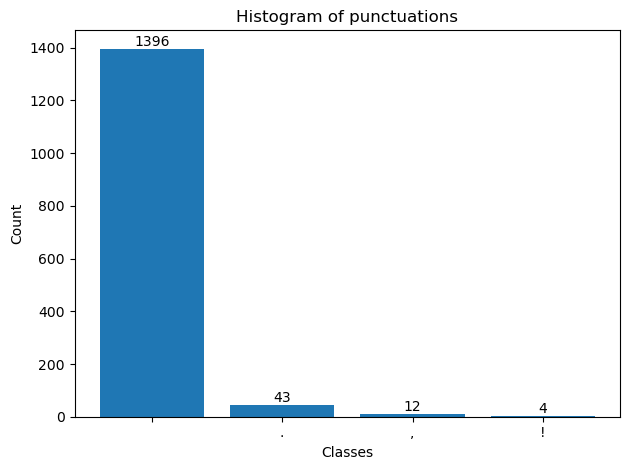

In [4]:
import matplotlib.pyplot as plt

column_name = "punc"
value_counts = dataset[column_name].value_counts()

# Get unique classes and their counts
classes = value_counts.index
counts = value_counts.values

plt.bar(range(len(classes)), counts)
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title(f"Histogram of punctuations")

# Set x-axis ticks and labels
plt.xticks(range(len(classes)), classes, rotation = 0)

for i, value in enumerate(counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig("./figures/dataset.png")
plt.show()


In [5]:
dataset = df.drop(df[df['punc'] == '!'].index)
dataset.loc[dataset["punc"] == ".", "punc"] = 1
dataset.loc[dataset["punc"] == ",", "punc"] = 2
dataset.loc[dataset["punc"] == " ", "punc"] = 0

In [6]:
dataset

,Time Stamps (s),Values,Labels,punc,dvop_next,dvop_prev,dx_next,dx_prev,dy_next,dy_prev,delta_next,delta_prev
0,0.535,0.0,M,0,0.15681,0.00520,0.160,1.000,0.0,0.0,0.0,0.0
1,0.695,0.0,M,0,0.06879,0.00319,0.200,0.160,-1.0,0.0,-5.0,0.0
2,0.895,-1.0,L,0,0.13140,0.00393,0.130,0.200,0.0,-1.0,0.0,-5.0
3,1.025,-1.0,L,0,0.00140,0.13393,0.230,0.130,0.0,0.0,0.0,0.0
4,1.255,-1.0,L,0,0.11290,0.00060,0.120,0.230,1.5,0.0,12.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,24.596,-1.0,L,0,0.06600,0.00700,0.065,0.155,0.0,0.0,0.0,0.0
1451,24.661,-1.0,L,0,0.00100,0.07200,0.205,0.065,0.0,0.0,0.0,0.0
1452,24.866,-1.0,L,0,0.00300,0.20400,0.060,0.205,0.0,0.0,0.0,0.0
1453,24.926,-1.0,L,0,0.10800,0.00600,0.125,0.060,0.0,0.0,0.0,0.0


In [7]:
c = ["Time Stamps (s)","Labels","punc"]
# c = ["Time Stamps (s)","Labels","punc"]

X = dataset.drop(columns=c).values
y = dataset["punc"].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X,y

(array([[ 0.0000e+00,  1.5681e-01,  5.2000e-03, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  6.8790e-02,  3.1900e-03, ...,  0.0000e+00,
         -5.0000e+00,  0.0000e+00],
        [-1.0000e+00,  1.3140e-01,  3.9300e-03, ..., -1.0000e+00,
          0.0000e+00, -5.0000e+00],
        ...,
        [-1.0000e+00,  3.0000e-03,  2.0400e-01, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.0000e+00,  1.0800e-01,  6.0000e-03, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.0000e+00,  6.9000e-02,  1.7000e-02, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]]),
 array([0, 0, 0, ..., 0, 0, 1]))

In [8]:
# X_train = X[:(-1)*len_list[-1],:]
# y_train = y[:(-1)*len_list[-1]]

# X_test = X[(-1)*len_list[-1]:,:]
# y_test = y[(-1)*len_list[-1]:]
# X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [9]:
# model = RandomForestClassifier(class_weight="balanced",random_state=42)

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test,zero_division=0))

# y_pred = model.predict(X_test[y_test == 1, :])
# print(accuracy_score(y_pred,y_test[y_test==1]))
# print("="*8)
# accuracy_scores.append(accuracy_score(y_pred,y_test[y_test==1]))

In [10]:
# list1 = [1,2,3,4,5,6,7,8,9,10]
# list2 = [10,9,8,7,6,5,4,3,2,1]
# len_list_temp = [0,2,3,2,3]
# len_list_temp=np.cumsum(len_list_temp)
# for i in range(len(len_list_temp)-1):
#     print(list1[len_list_temp[i]:len_list_temp[i+1]])

In [11]:
# len_list = np.pad(len_list_original, (1, 0), 'constant', constant_values=(0, 0))
# print(len_list_cum)

In [12]:
accuracy_scores = []
feature_importances = []
len_list_cum = np.cumsum(len_list_original)
for i in range(len(len_list_original)-1):
    print(f"para_{i+2} is test and rest is train data")
    print(len_list_cum[i],len_list_cum[i+1])
    X_test = X[len_list_cum[i]:len_list_cum[i+1]]
    y_test = y[len_list_cum[i]:len_list_cum[i+1]]
    # Training set (remaining values)
    X_train = np.concatenate((X[:len_list_cum[i]], X[len_list_cum[i+1]:]), axis=0)
    y_train = np.concatenate((y[:len_list_cum[i]], y[len_list_cum[i+1]:]), axis=0)
    
    print(X_train.shape,y_train.shape,X_test.shape,y_test.shape )   
    
    model = RandomForestClassifier(class_weight="balanced",random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_pred,y_test,zero_division=0))

    y_pred = model.predict(X_test[y_test == 1, :])
    print(accuracy_score(y_pred,y_test[y_test==1]))
    print("="*8)
    accuracy_scores.append(accuracy_score(y_pred,y_test[y_test==1]))
    feature_importances.append(model.feature_importances_)

para_2 is test and rest is train data
299 471
(1279, 9) (1279,) (172, 9) (172,)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         0

    accuracy                           0.99       172
   macro avg       0.58      0.66      0.62       172
weighted avg       1.00      0.99      0.99       172

0.75
para_3 is test and rest is train data
471 632
(1290, 9) (1290,) (161, 9) (161,)
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       157
           1       0.60      0.75      0.67         4
           2       0.00      0.00      0.00         0

    accuracy                           0.96       161
   macro avg       0.53      0.57      0.55       161
weighted avg       0.98      0.96      0.97       161

0.6
para_4 is test and rest is train data
632 844
(1239, 9) (1239,) (212,

In [13]:
print(np.mean(accuracy_scores))

0.624829931972789


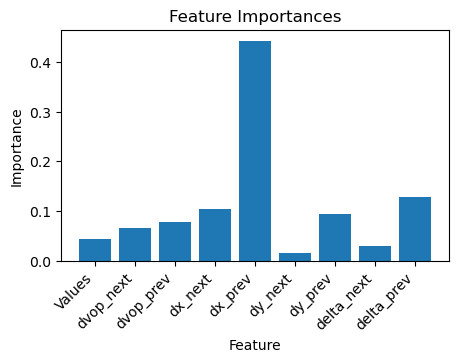

In [15]:
# Plot the feature importances
plt.figure(figsize=(5, 3))
plt.bar(dataset.drop(columns=c).columns,np.mean(feature_importances,axis=0))
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45, ha="right")
plt.savefig("./figures/feat_imp.png")
plt.show()